In [1]:
import pandas as pd
from master_thesis.src import utils
import matplotlib.pyplot as plt
import scipy.stats as st

In [13]:
EMOTION = utils.PROJECT_ROOT / 'master_thesis' / 'experiments' / 'emotion'
emo = pd.read_csv(EMOTION / 'jemas_vo.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen200000.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen100000.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen10000.tsv', sep = '\t', index_col = 0)
#emo = pd.read_csv(EMOTION / 'jemas_MEmoLon_maxlen5000.tsv', sep = '\t', index_col = 0)



In [14]:
emo.head()

,text_preprocessed,valence,arousal,token_recognition
articleId,,,,
49297055,"Nach dem schweren Unfall in Essen, bei dem am ...",-0.041,2.886,0.328
49307861,Real Madrid hat den 180. Clásico in der spanis...,0.624,2.358,0.236
49307973,Bei der Ausbreitung des neuen Coronavirus geht...,0.335,2.558,0.223
49308023,Der nicaraguanische Dichter und Theologe Ernes...,-0.090,2.849,0.313
49308055,Kurz vor den Vorwahlen am «Super Tuesday» hat ...,0.492,2.700,0.219


In [15]:
emo.shape

(84887, 4)

In [16]:
emo.describe()

,valence,arousal,token_recognition
count,84887.000000,84887.000000,84887.000000
mean,0.438702,2.620028,0.243694
std,0.357106,0.158639,0.061173
min,-2.020000,1.632000,0.000000
25%,0.206000,2.520000,0.204000
50%,0.436000,2.615000,0.242000
75%,0.674000,2.712000,0.281000
max,2.700000,4.050000,0.614000


In [17]:
len(emo[emo.token_recognition > 0.3])

13655

In [18]:
emo.sort_values('valence', ascending = True)[emo.token_recognition > 0.3].head(10)
#emo.sort_values('arousal', ascending = False)[emo.token_recognition > 0.3]

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,text_preprocessed,valence,arousal,token_recognition
articleId,,,,
51720053,Nach der Anklage wegen des Mords an einem Geor...,-1.531,3.386,0.316
2011293,"Waffenstillstände gab es im Syrienkrieg viele,...",-1.066,3.261,0.303
49973969,Im Streit um die polnischen Justizreformen hat...,-1.009,3.108,0.435
53408655,Nach einem Hacker-Angriff von Erpressern auf d...,-0.991,3.268,0.333
49653739,"Horst Seehofer hat nun eine Gruppe verboten, d...",-0.979,3.166,0.400
50360837,Das Landgericht Duisburg hat am Montag den Pro...,-0.966,3.132,0.320
49856827,In der japanischen Großindustrie sorgt die Ang...,-0.887,3.038,0.316
2069496,Endlich wieder Bewegung im Kampf gegen Kindesm...,-0.852,3.296,0.308
2103716,Er soll auf offener Straße seine Ex-Freundin m...,-0.833,3.314,0.328


In [19]:
ID = 51720053
print(emo.loc[ID, 'text_preprocessed'])

Nach der Anklage wegen des Mords an einem Georgier in Berlin hat Bundesaußenminister Heiko Maas Russland mit weiteren Strafmaßnahmen wegen des Falls gedroht. «Die Bundesregierung behält sich weitere Maßnahmen in diesem Fall ausdrücklich vor», sagte Maas am Donnerstag in Wien.


In [29]:
emo[(emo.valence < -1.5) & (emo.arousal > 1.5)]
#emo[(emo.valence > 1.5) & (emo.arousal > 2)]


,text_preprocessed,valence,arousal,token_recognition
articleId,,,,
49390401,Fußball-Bundesligist Bayer Leverkusen muss für...,-1.941,3.733,0.045
49517289,Die EZB steckt bis zum Jahresende 120 Milliard...,-1.700,3.286,0.053
49729395,Schleswig-Holsteins Bildungsministerin Karin P...,-2.000,3.368,0.043
50303227,Im Mordfall Lübcke hat der Generalbundesanwalt...,-1.553,3.720,0.148
51044635,Die österreichischen Kindergeld-Regeln für EU-...,-1.529,3.056,0.059
51720053,Nach der Anklage wegen des Mords an einem Geor...,-1.531,3.386,0.316
52090593,Rund acht Monate nach dem tödlichen Angriff au...,-1.598,3.634,0.259
2044491,Im Mordfall Lübcke hat der Generalbundesanwalt...,-1.553,3.720,0.148
2084206,Rund acht Monate nach dem tödlichen Angriff au...,-1.598,3.634,0.259


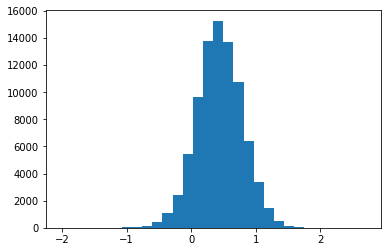

In [30]:
plt.hist(emo.valence, 30)
plt.show()

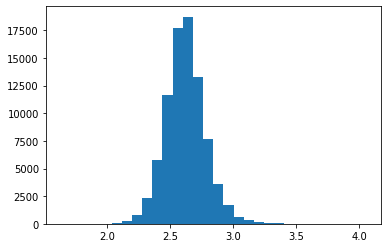

In [31]:
plt.hist(emo.arousal, 30)
plt.show()

In [32]:
df = utils.get_conditioned_df()
df.set_index('articleId', inplace = True)

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (7902, 73)


In [33]:
df.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
articleId,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,...,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78,7.888889,1
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,...,5392,43.0,18.395349,0.293220,2.526961,204.624735,0.041710,199,8.617978,0
49308139,1749,1080,1123,775,135787,NaN,216.912141,35.791881,61.749571,44.311035,...,5483,42.0,18.523810,0.283175,2.332389,211.883023,0.039561,626,8.236559,0
49308293,1493,508,708,342,149762,NaN,190.779618,52.578701,34.025452,22.906899,...,3953,37.0,16.027027,0.326677,2.725423,183.667419,0.048262,785,8.342857,0
49308469,252,14,61,8,21314,NaN,111.591623,75.793651,5.555556,3.174603,...,2131,16.0,18.187500,0.392928,2.936622,152.699634,0.052366,191,7.473684,0


In [34]:
# append the emotional values
for ID in df.index.to_list():
    df.loc[ID, 'valence'] = emo.loc[ID, 'valence']
    df.loc[ID, 'arousal'] = emo.loc[ID, 'arousal']
    # df.loc[ID, 'dominance'] = emo.loc[ID, 'dominance']

In [35]:
df.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class,valence,arousal
articleId,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,...,12.636364,0.646894,5.103276,92.750872,0.094700,78,7.888889,1,-0.041,2.886
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,...,18.395349,0.293220,2.526961,204.624735,0.041710,199,8.617978,0,0.492,2.700
49308139,1749,1080,1123,775,135787,NaN,216.912141,35.791881,61.749571,44.311035,...,18.523810,0.283175,2.332389,211.883023,0.039561,626,8.236559,0,0.175,2.745
49308293,1493,508,708,342,149762,NaN,190.779618,52.578701,34.025452,22.906899,...,16.027027,0.326677,2.725423,183.667419,0.048262,785,8.342857,0,0.421,2.445
49308469,252,14,61,8,21314,NaN,111.591623,75.793651,5.555556,3.174603,...,18.187500,0.392928,2.936622,152.699634,0.052366,191,7.473684,0,0.668,2.665


(0.0031019919401455605, 0.7827761814162333)
(0.05599586732027159, 6.333111240839079e-07)


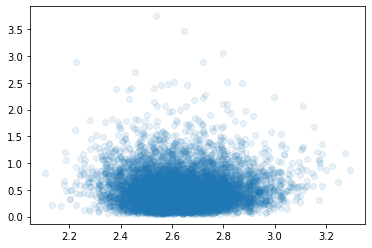

In [46]:
plt.scatter(df.arousal, df.avgTimeOnPagePerWordcount, alpha = 0.1)
print(st.pearsonr(df.arousal, df.avgTimeOnPagePerWordcount))
print(st.pearsonr(df.valence, df.avgTimeOnPagePerWordcount))

In [47]:
print(st.pearsonr(df.arousal, df.pageviews))
print(st.pearsonr(df.arousal, df.entranceRate))
print(st.pearsonr(df.arousal, df.stickiness))
print(st.pearsonr(df.arousal, df.bounceRate))
print("---")
print(st.pearsonr(df.valence, df.pageviews))
print(st.pearsonr(df.valence, df.entranceRate))
print(st.pearsonr(df.valence, df.stickiness))
print(st.pearsonr(df.valence, df.bounceRate))
# hm schade, irgendwie korreliert da nichts...

(-0.03485525980502863, 0.0019427548143500753)
(-0.09065646332271728, 6.797766899500882e-16)
(0.10610361794608342, 3.1659411001675326e-21)
(-0.05821035231698089, 2.24185481792822e-07)
---
(0.0027690681830743196, 0.8055948784588634)
(0.031425097244522575, 0.005210472184756242)
(-0.06390583815237304, 1.3027225497108066e-08)
(0.030853300074010343, 0.0060905264119262325)


In [48]:
df.publisher.value_counts()

NOZ         2414
bonn        2244
aachener    1609
SZ          1097
TV           538
Name: publisher, dtype: int64

In [49]:
# one publisher

In [54]:
for p in df.publisher.unique():
    print(p)
    tmp = df[df.publisher == p]
    print("arousal:")
    print(st.pearsonr(tmp.arousal, tmp.avgTimeOnPagePerWordcount))
    print(st.pearsonr(tmp.arousal, tmp.avgTimeOnPage))
    print(st.pearsonr(tmp.arousal, tmp.pageviews))
    print("valence:")
    print(st.pearsonr(tmp.valence, tmp.avgTimeOnPagePerWordcount))
    print(st.pearsonr(tmp.valence, tmp.avgTimeOnPage))
    print(st.pearsonr(tmp.valence, tmp.pageviews))
    print("------")

bonn
arousal:
(0.023437932759215265, 0.2670812323693487)
(-0.03581872816275858, 0.08981706434589315)
(-0.008516409980458588, 0.6867920240905927)
valence:
(0.008750108257746917, 0.6786710506268798)
(-0.03207246432361323, 0.12880152692280256)
(-0.010943419226733586, 0.6043703347593309)
------
NOZ
arousal:
(-0.04450393953665267, 0.028776160501518943)
(-0.025266373039038913, 0.21462254031097786)
(-0.05150459880455252, 0.011376459916897548)
valence:
(0.09377235492528659, 3.929943561300486e-06)
(-0.01562978110083124, 0.4427373676505648)
(0.0059060736042789086, 0.7717915714003996)
------
aachener
arousal:
(-0.008978252397041952, 0.7189472685775345)
(0.030752471264263052, 0.21761808619233694)
(-0.07203587177154351, 0.003839712858735624)
valence:
(0.008610121555593429, 0.730011577776549)
(-0.055055667608111564, 0.027218454515274743)
(-0.0004594811756319895, 0.9853065549180322)
------
SZ
arousal:
(0.028188055307290672, 0.35095564321805306)
(0.04905409586158847, 0.10440877189725285)
(-0.017516513

auch innerhalb eines Publishers keine Korrelation...